# Team 03 - UDCN
### Date Experiment: 16.30 - Nov.21,2018 - Date Analysis: 23.11 - Nov.21,2018

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pylab as plt
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv('Data_Experiment_Nov212018.csv')
# Tinh so dem - tru phong
data['N']=np.mean(data.loc[:,'N1':'N2'],axis=1)
data.loc[1:,'N']=data.loc[1:,'N'] - data.loc[0,'N']
# Tinh rho = mass / volume
data['rho']=data['Mass']/data['Volume']
# Tinh mu = -ln(I/I0) / d
d = 2.70 # cm
data['mu'] = np.NaN
N0=data.loc[1,'N'] # Gia tri I0 
data.loc[2:,'mu'] = -np.log(data.loc[2:,'N']/N0)/d
data

,Solution,Mass,Volume,N1,N2,N3,N,rho,mu
0,Background,0.0000,100,154,135,135,144.5,0.000000,NaN
1,Source,0.0000,100,3200,3222,3173,3066.5,0.000000,NaN
2,Salt_Solution,118.2096,100,2123,2062,2030,1948.0,1.182096,0.168049
3,Sugar_Solution,108.7488,80,2096,2155,2287,1981.0,1.359360,0.161828
4,Water,98.7284,100,2395,2412,2363,2259.0,0.987284,0.113191
5,Ethanol,56.5878,73,2563,2585,2634,2429.5,0.775175,0.086241
6,CocaCola_Solution,104.3418,102,2356,2415,2354,2241.0,1.022959,0.116154


In [3]:
# Phuong trinh mu = a  + b.rho
fit=smf.ols(formula='mu~rho',data=data.loc[2:5,]).fit()
fit.params
# Result: mu =  -0.037328    + 0.192176 .rho
# Phuong trinh chuan he so truyen qua: mu (cm-1) =  -0.037328    + 0.192176 .rho (g/cm3)

Intercept   -0.024670
rho          0.145911
dtype: float64

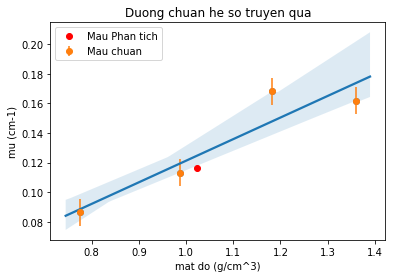

In [5]:
# Ve mau chuan va duong fit OLS
plt.subplots
sn.regplot(x='rho',y='mu',data=data.loc[2:5,],ci=80)
plt.errorbar(data.loc[2:5,'rho'], data.loc[2:5,'mu'], yerr=0.009,fmt='o',label='Mau chuan')
# Ve mau phan tich
plt.plot(data.loc[6:,'rho'],data.loc[6:,'mu'],'ro',label='Mau Phan tich')
# Trinh bay do thi
plt.legend(loc=2)
plt.xlabel('mat do (g/cm^3)')
plt.ylabel('mu (cm-1)')
plt.title('Duong chuan he so truyen qua')
plt.savefig('Result_figure.png',dpi=300)

In [6]:
# Phuong trinh rho = a  + b.mu
fit_revert=smf.ols(formula='rho~mu',data=data.loc[2:5,]).fit()
data['Result']=np.NaN
data.loc[6:,'Result']=fit_revert.predict({'mu':data.loc[6:,'mu']})
# danh gia sai so
data['sigma']=np.NaN
data.loc[6:,'sigma']=np.abs(data.loc[6:,'Result']-data.loc[6:,'rho'])/data.loc[6:,'rho']*100
data.to_csv('Result_Analysis.csv') 
# result 
data

,Solution,Mass,Volume,N1,N2,N3,N,rho,mu,Result,sigma
0,Background,0.0000,100,154,135,135,144.5,0.000000,NaN,NaN,NaN
1,Source,0.0000,100,3200,3222,3173,3066.5,0.000000,NaN,NaN,NaN
2,Salt_Solution,118.2096,100,2123,2062,2030,1948.0,1.182096,0.168049,NaN,NaN
3,Sugar_Solution,108.7488,80,2096,2155,2287,1981.0,1.359360,0.161828,NaN,NaN
4,Water,98.7284,100,2395,2412,2363,2259.0,0.987284,0.113191,NaN,NaN
5,Ethanol,56.5878,73,2563,2585,2634,2429.5,0.775175,0.086241,NaN,NaN
6,CocaCola_Solution,104.3418,102,2356,2415,2354,2241.0,1.022959,0.116154,0.979314,4.266542
